<a href="https://colab.research.google.com/github/ducnguyen1704/pandas2/blob/master/HopNhatDuLieu_Dong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Thực hành] Hợp nhất các dòng dữ liệu từ nhiều data frame/

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# load data
df = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31021019/FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


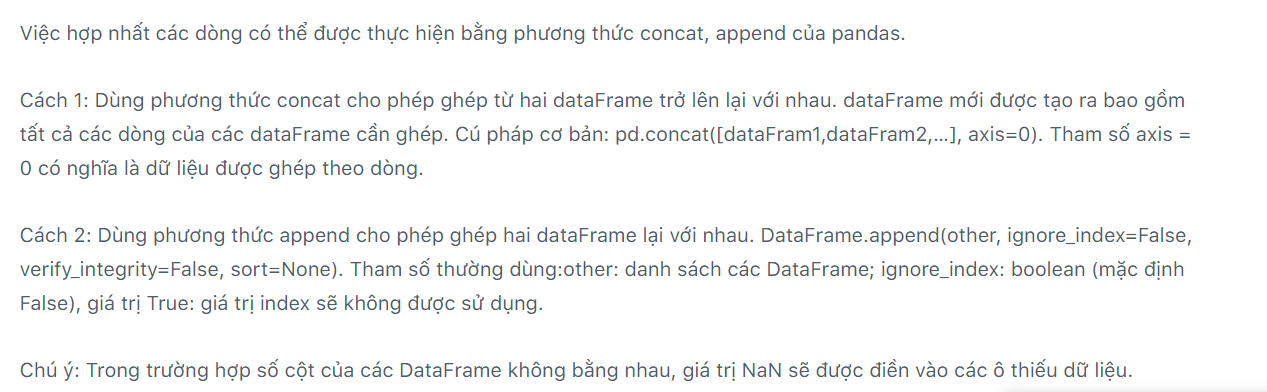

1. Tách thành các file nhỏ

In [ ]:
# Tách file 1 chứa 5000 bản ghi đầu tiên
df1 = df.loc[0:4999,:]
df1

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
4995,Istanbul,244,Chickpeas - Retail,5,KG,9,2019,9.3149
4996,Istanbul,244,Chickpeas - Retail,5,KG,10,2019,9.3030
4997,Istanbul,244,Chickpeas - Retail,5,KG,11,2019,9.3457
4998,Istanbul,244,Chickpeas - Retail,5,KG,12,2019,9.1283


In [ ]:
# Tách file 2 chứa các bản ghi còn lại
df2 = df.loc[5000:7380,:]
df2

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
5000,Istanbul,254,Bananas - Retail,5,KG,2,2017,6.6223
5001,Istanbul,254,Bananas - Retail,5,KG,3,2017,7.4073
5002,Istanbul,254,Bananas - Retail,5,KG,4,2017,8.6899
5003,Istanbul,254,Bananas - Retail,5,KG,5,2017,8.7397
5004,Istanbul,254,Bananas - Retail,5,KG,6,2017,8.2051
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [ ]:
# Tách file 3 chứa thông tin giá với số dòng từ bản ghi 1000 đến 2000
df3 = df.loc[1000:2000,['ProductId','Place','Month','Year','Price']]
df3

,ProductId,Place,Month,Year,Price
1000,176,National Average,4,2016,4.4000
1001,176,National Average,5,2016,4.4600
1002,176,National Average,6,2016,4.5400
1003,176,National Average,7,2016,4.5700
1004,176,National Average,8,2016,4.5900
...,...,...,...,...,...
1996,360,National Average,12,2019,3.5717
1997,364,National Average,6,2015,4.0000
1998,364,National Average,7,2015,3.9700
1999,364,National Average,8,2015,4.0100


2. Tiến hành ghép lại

In [ ]:
df4=pd.concat([df1,df2], axis=0)
df4

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [ ]:
df5=pd.concat([df1,df2,df3], axis=0)
df5

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5.0,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5.0,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5.0,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5.0,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5.0,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
1996,National Average,360,NaN,NaN,NaN,12,2019,3.5717
1997,National Average,364,NaN,NaN,NaN,6,2015,4.0000
1998,National Average,364,NaN,NaN,NaN,7,2015,3.9700
1999,National Average,364,NaN,NaN,NaN,8,2015,4.0100


In [ ]:
df6=df1.append(df2)
df6

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [ ]:
df7=df1.append(df3)
df7

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5.0,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5.0,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5.0,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5.0,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5.0,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
1996,National Average,360,NaN,NaN,NaN,12,2019,3.5717
1997,National Average,364,NaN,NaN,NaN,6,2015,4.0000
1998,National Average,364,NaN,NaN,NaN,7,2015,3.9700
1999,National Average,364,NaN,NaN,NaN,8,2015,4.0100
